# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [5]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\15613\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin",
                                          language="en",
                                          sort_by="relevancy")
bitcoin_headlines


{'status': 'ok',
 'totalResults': 9491,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Arielle Pardes',
   'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
   'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
   'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
   'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
   'publishedAt': '2022-05-10T16:59:46Z',
   'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'Why fossil fuel companies see green in Bitcoin mining projects',
   'description': 'Exxo

In [9]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q='Ethereum',
                                          language='en',
                                          sort_by="relevancy")
ethereum_headlines

{'status': 'ok',
 'totalResults': 4572,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': "Here's what NFTs look like on Instagram",
   'description': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital wallet and posting for the world to see. If you like, the social …",
   'url': 'https://www.engadget.com/instagram-nft-details-131020868.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-05/2546c160-d05e-11ec-b75e-e45eaa8c5b2b',
   'publishedAt': '2022-05-10T13:10:20Z',
   'content': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]"},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Kyle Ba

In [10]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.0772,0.000,0.964,0.036,"Now, even though there are a number of women-f..."
1,-0.0516,0.061,0.882,0.056,A Bitcoin mining site powered by otherwise los...
2,-0.3269,0.143,0.772,0.085,Warren Buffett has always been a bitcoin skept...
3,0.3400,0.000,0.928,0.072,"Image source, Getty Images\r\nThe value of Bit..."
4,0.3818,0.052,0.833,0.114,"As a kid, I remember when my father tried to u..."


In [11]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.6486,0.000,0.865,0.135,Meta has revealed more of how NFTs will work o...
1,-0.1027,0.040,0.960,0.000,GameStop has officially thrown itself headlong...
2,-0.2263,0.075,0.879,0.046,A multi-billion dollar cryptocurrency company ...
3,-0.2732,0.055,0.945,0.000,When Bored Ape Yacht Club creators Yuga Labs a...
4,0.1280,0.000,0.954,0.046,GameStop is going all-in on crypto. The video ...


In [12]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.119220,0.084900,0.851800,0.063350
std,0.404397,0.075734,0.100743,0.060985
min,-0.859300,0.000000,0.557000,0.000000
25%,-0.386825,0.057250,0.827000,0.000000
50%,-0.284600,0.071500,0.878000,0.055000
75%,0.156025,0.103750,0.923000,0.085000
max,0.750600,0.300000,0.964000,0.202000


In [13]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.088800,0.048600,0.918700,0.032800
std,0.343530,0.043472,0.051321,0.051042
min,-0.690800,0.000000,0.822000,0.000000
25%,-0.284450,0.000000,0.875500,0.000000
50%,-0.153100,0.050000,0.935000,0.000000
75%,0.045025,0.069000,0.955000,0.051750
max,0.690800,0.178000,1.000000,0.178000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin did with 0.063350

Q: Which coin had the highest compound score?

A: Bitcoin did with 0.7506

Q. Which coin had the highest positive score?

A: Bitcoin did with 0.202000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {}
sw = sw.union(sw_addon)

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    #tokens = ' '.join(tokens)
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0772,0.000,0.964,0.036,"Now, even though there are a number of women-f...","[even, though, number, womenfocused, crypto, s..."
1,-0.0516,0.061,0.882,0.056,A Bitcoin mining site powered by otherwise los...,"[bitcoin, mining, site, powered, otherwise, lo..."
2,-0.3269,0.143,0.772,0.085,Warren Buffett has always been a bitcoin skept...,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,0.3400,0.000,0.928,0.072,"Image source, Getty Images\r\nThe value of Bit...","[image, source, getty, imagesthe, value, bitco..."
4,0.3818,0.052,0.833,0.114,"As a kid, I remember when my father tried to u...","[kid, remember, father, tried, use, broom, han..."


In [18]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.6486,0.000,0.865,0.135,Meta has revealed more of how NFTs will work o...,"[meta, ha, revealed, nfts, work, instagram, us..."
1,-0.1027,0.040,0.960,0.000,GameStop has officially thrown itself headlong...,"[gamestop, ha, officially, thrown, headlong, w..."
2,-0.2263,0.075,0.879,0.046,A multi-billion dollar cryptocurrency company ...,"[multibillion, dollar, cryptocurrency, company..."
3,-0.2732,0.055,0.945,0.000,When Bored Ape Yacht Club creators Yuga Labs a...,"[bored, ape, yacht, club, creator, yuga, labs,..."
4,0.1280,0.000,0.954,0.046,GameStop is going all-in on crypto. The video ...,"[gamestop, going, allin, crypto, video, game, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
bitcoin_ngram = ngrams(tokenizer(bitcoin_df.text.str.cat()),n=2)
bitcoin_ngram_counts = Counter(bitcoin_ngram)

print(dict(bitcoin_ngram_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'charsa'): 1, ('charsa', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype

In [21]:
# Generate the Ethereum N-grams where N=2
ethereum_ngram = ngrams(tokenizer(ethereum_df.text.str.cat()),n=2)
ethereum_ngram_counts = Counter(ethereum_ngram)

print(dict(ethereum_ngram_counts))

{('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'charsgamestop'): 1, ('charsgamestop', 'ha'): 1, ('ha', 'officially'): 1, ('officially', 'thrown'): 1, ('thrown', 'headlong'): 1, ('headlong', 'web'): 1, ('web', 'viper'): 1, ('viper', 'nest'): 1, ('nest', 'new'): 1, ('new', 'app'): 1, ('app', 'release'): 1, ('release', 'though'): 1, ('though', 'hard'): 1, ('hard', 'say'): 1, ('say', 'whether'): 1, ('whether', 'proposed'): 1, ('proposed', 'population'): 1, ('population', 'gamers'): 1, ('gamers', 'game'): 1, ('game', 'developer'): 1, ('developer', 'take'): 1, ('take', 'charsa')

In [22]:
# Function token_count generates the top 10 words for a given coin
# changed the function code so N is an unset varialbe until it's passed via the function call...orig code had def token_count(tokens, N=10):
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_10 = token_count(tokenizer(bitcoin_df.text.str.cat()),10)
bitcoin_top_10

[('bitcoin', 9),
 ('cryptocurrency', 9),
 ('world', 6),
 ('week', 6),
 ('new', 6),
 ('blockchain', 5),
 ('reuters', 5),
 ('investor', 4),
 ('stolen', 4),
 ('biggest', 4)]

In [29]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_10 = token_count(tokenizer(ethereum_df.text.str.cat()), 10)
ethereum_top_10

[('cryptocurrency', 11),
 ('ha', 8),
 ('bitcoin', 6),
 ('ethereum', 5),
 ('nft', 5),
 ('last', 5),
 ('world', 5),
 ('digital', 4),
 ('sale', 4),
 ('biggest', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

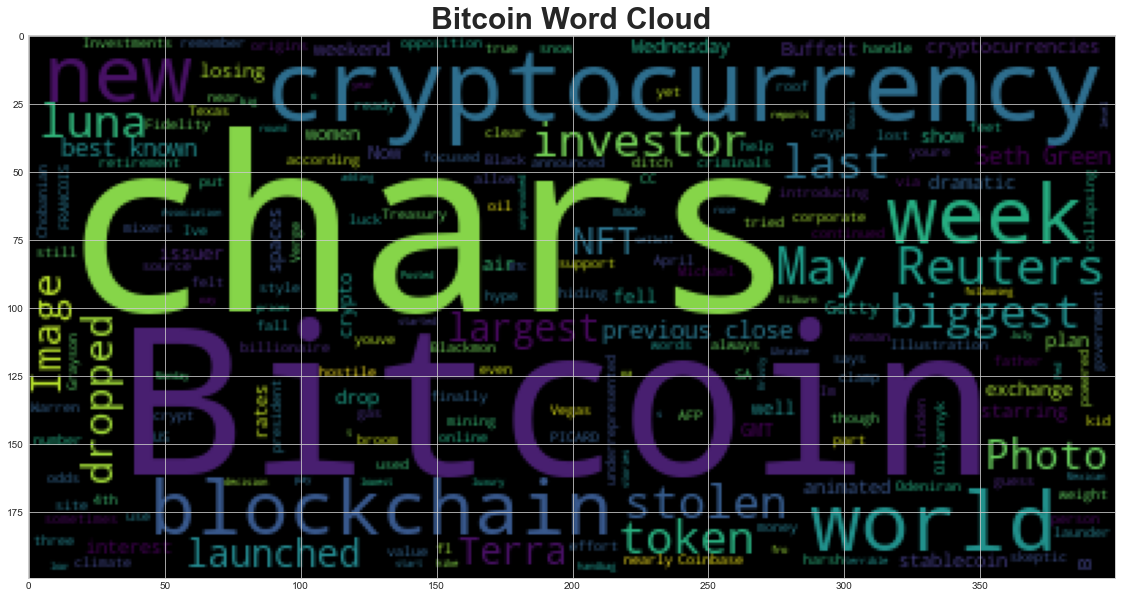

In [48]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.title('Bitcoin Word Cloud', fontweight="bold", fontsize=30)
plt.imshow(bitcoin_wc)

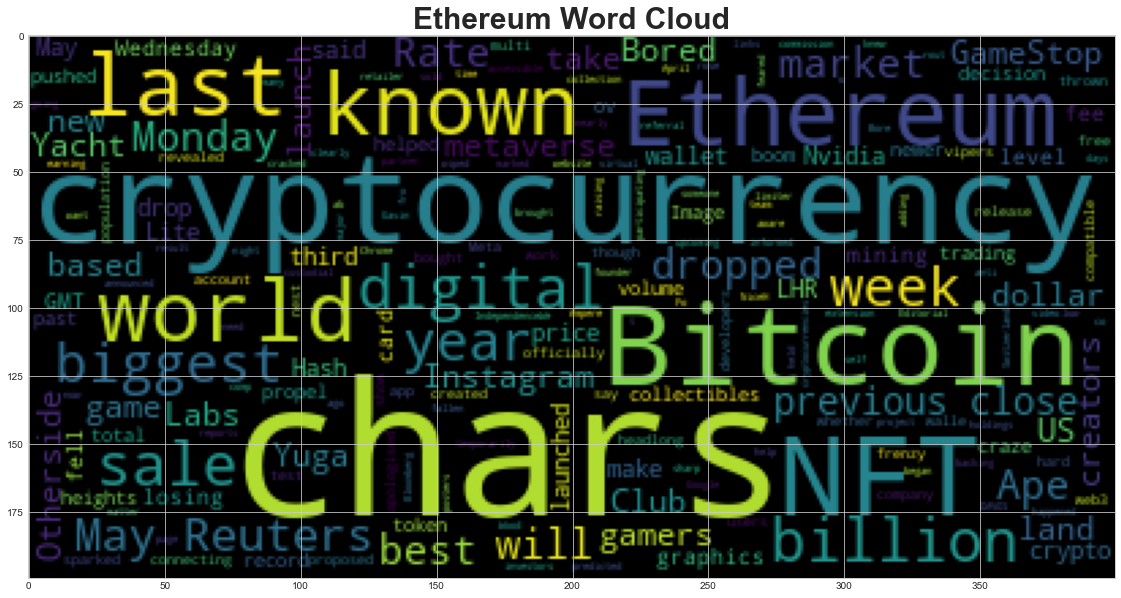

In [49]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(ethereum_df.text.str.cat())
plt.title('Ethereum Word Cloud', fontweight="bold", fontsize=30)
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
bitcoin_string = bitcoin_df.text.str.cat()
bitcoin_string


"Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to the Coinbase cryptocurrency exchange.\r\nThe world's largest cryp… [+2164 chars]As a kid, I remember when my father tried to use a broom handle in a last ditch effort to support a roof that was collapsing from the 

In [36]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_string)

# Add a title to the document
title = "Bitcoin NER"

In [42]:
# Render the visualization
print(title)
displacy.render(bitcoin_doc, style='ent')

Bitcoin NER


In [43]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)


Odeniran GPE
Linden GPE
Texas GPE
April 4th, 2022 DATE
Photo PERSON
FRANCOIS PICARD/AFP ORG
Getty Images ORG
Buffett PERSON
the weekend DATE
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
nearly three feet QUANTITY
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
Grayson Blackmon PERSON
Oliyarnyk / CC-BY-SA-4.0 ORG
Michael Chobanian PERSON
the Blockchain Association of Ukraine ORG
Bitcoin ORG
Gucci handbag PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
+361 chars]May 4 ORG
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
9 CARDINAL
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 chars]May ORG
24 CARDINAL
Reuters ORG
its ninth we

---

### Ethereum NER

In [44]:
# Concatenate all of the Ethereum text together
ethereum_string = ethereum_df.text.str.cat()
ethereum_string

'Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars]When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars]GameStop is going all-in on crypto. The video game retailer launched\xa0its own self-custodial Ethereum digital wallet, it said Monday. The 

In [45]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_string)

# Add a title to the document
title = "Ethereum NER"

In [46]:
# Render the visualization
print(title)
displacy.render(ethereum_doc, style='ent')

Ethereum NER


In [47]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)


Meta ORG
Instagram ORG
US GPE
Instagram ORG
chars]GameStop ORG
web3 LOC
Ethereum ORG
Yuga Labs PERSON
Yacht Club ORG
Yuga Labs PERSON
Otherside NFT LAW
April 30 DATE
NFT ORG
Ethereum ORG
Monday DATE
Google Chrome PRODUCT
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
Last night TIME
Bloomberg GPE
nearly a third CARDINAL
a billion dollars MONEY
IndependenceWe NORP
chars]40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Nvidia PERSON
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
4 CARDINAL
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
+361 chars]May 9 ORG
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
8 CARDINAL
Nvidia ORG
LHR ORG
last year  DATE
NFT ORG
Ethereum ORG
Last week DATE
last July DATE
33,000 MONEY
the week DATE
last week DAT

---